In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df=df.iloc[:,2:]

In [7]:
df.sample(5)

,Age,EstimatedSalary,Purchased
51,18,44000,0
274,57,26000,1
237,37,80000,0
284,48,141000,0
372,39,73000,0


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [13]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [21]:
X_train_scaled #Gives Numpy array at first

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [15]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [16]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [18]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


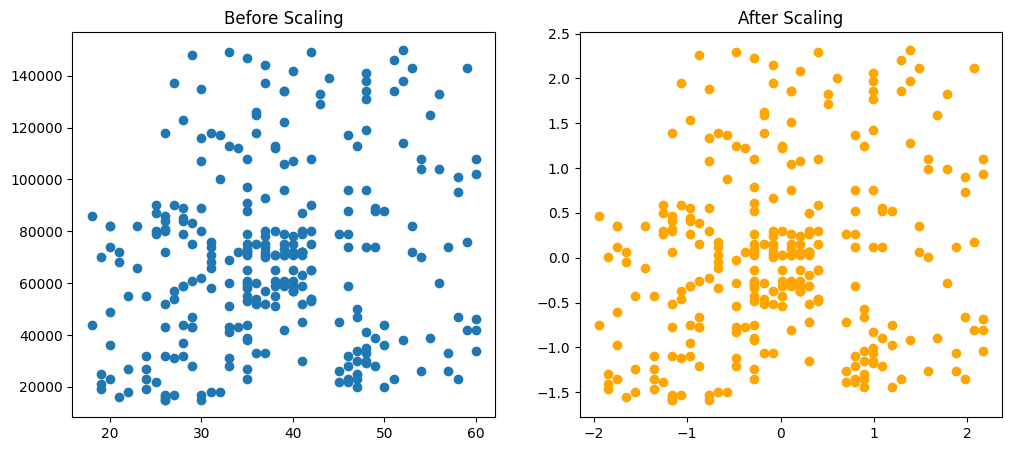

In [20]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x='Age',y='EstimatedSalary',data=X_train)
ax1.set_title("Before Scaling")
ax2.scatter(x='Age',y='EstimatedSalary',data=X_train_scaled,color='orange')
ax2.set_title("After Scaling")
plt.show()

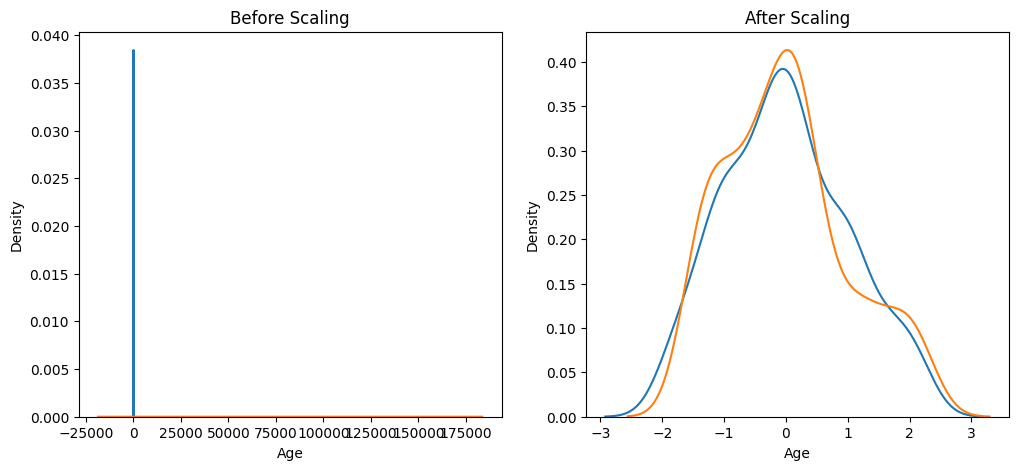

In [24]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x='Age',data=X_train,ax=ax1)
sns.kdeplot(x='EstimatedSalary',data=X_train,ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(x='Age',data=X_train_scaled,ax=ax2)
sns.kdeplot(x='EstimatedSalary',data=X_train_scaled,ax=ax2)
ax2.set_title("After Scaling")
plt.show()

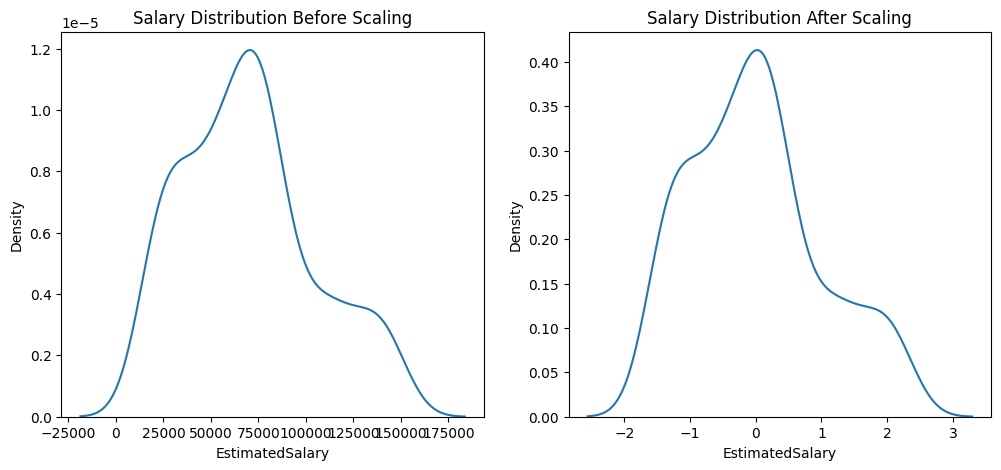

In [25]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x='EstimatedSalary',data=X_train,ax=ax1)
ax1.set_title("Salary Distribution Before Scaling")

sns.kdeplot(x='EstimatedSalary',data=X_train_scaled,ax=ax2)
ax2.set_title("Salary Distribution After Scaling")
plt.show()